## Application of Geoplanar

In this notebook we will use the appended original two countries data from US/Canada data (Not Planar Enforced)

#### Steps
- Data Retreival
- Check the presence of gaps using geoplanar
- Fixing the issues of gaps using geoplanar
- Selectively fixing one or more gaps using geoplanar


In [1]:
import geoplanar
import geopandas as gpd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

### 1. Data Retrieval 

In [9]:
df_can_gaps_removed= gpd.read_parquet("datasets/uscan_new.parquet")
df_can_gaps_removed.head()

,index,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,...,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1
0,0,20.750,34.956,1.0,1.0,Washington,53,Pacific,WA,"MULTIPOLYGON (((-122.40075 48.22540, -122.4615...",...,None,None,None,None,None,None,None,None,None,None
1,1,45.132,34.527,2.0,2.0,Montana,30,Mtn,MT,"POLYGON ((-111.47463 44.70224, -111.48001 44.6...",...,None,None,None,None,None,None,None,None,None,None
2,2,9.571,18.899,3.0,3.0,Maine,23,N Eng,ME,"MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...",...,None,None,None,None,None,None,None,None,None,None
3,3,21.874,21.353,4.0,4.0,North Dakota,38,W N Cen,ND,"POLYGON ((-98.73006 45.93830, -99.00645 45.939...",...,None,None,None,None,None,None,None,None,None,None
4,4,22.598,22.746,5.0,5.0,South Dakota,46,W N Cen,SD,"POLYGON ((-102.78793 42.99532, -103.00541 42.9...",...,None,None,None,None,None,None,None,None,None,None


In [10]:
df_can_gaps_removed.columns

Index(['index', 'AREA', 'PERIMETER', 'STATE_', 'STATE_ID', 'STATE_NAME',
       'STATE_FIPS', 'SUB_REGION', 'STATE_ABBR', 'geometry', 'COUNTRY',
       'GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1'],
      dtype='object')

<AxesSubplot:>

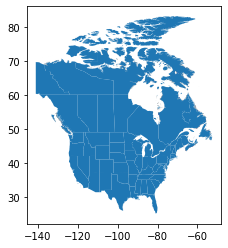

In [11]:
df_can_gaps_removed.plot()

In [12]:
df_can_gaps_removed.shape

(61, 21)

In [13]:
gaps=geoplanar.gaps(df_can_gaps_removed) # identifying the gaps

In [70]:
gaps.shape

(134, 2)

In this data set we found 134 total gaps.

<AxesSubplot:>

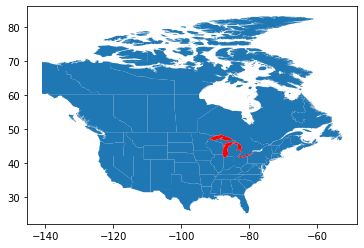

In [72]:
base = df_can_gaps_removed.plot()
gaps.plot(color='red', ax=base) 

### 2. Appending Gaps as Separate Polygons with the Data

In [16]:
#Assigning gaps a country value called no land since these are the great lakes
gaps ['COUNTRY'] = 'EMPTY'


In [17]:
gaps.head()

,geometry,COUNTRY
1,"POLYGON ((-79.05679 43.23756, -79.05059 43.204...",EMPTY
2,"POLYGON ((-79.04915 43.19638, -79.03956 43.144...",EMPTY
3,"POLYGON ((-78.90668 42.90353, -78.85944 42.792...",EMPTY
4,"POLYGON ((-77.12263 38.93206, -77.04239 38.993...",EMPTY
5,"POLYGON ((-101.38350 49.00008, -101.36248 49.0...",EMPTY


In [18]:
with_gaps = gaps.append(df_can_gaps_removed)
with_gaps.reset_index(inplace=True )


In [145]:
with_gaps.describe()


,level_0,index,AREA,PERIMETER,STATE_,STATE_ID
count,195.000000,61.000000,48.000000,48.000000,48.000000,48.000000
mean,55.769231,19.770492,17.022792,22.912771,25.000000,25.000000
std,37.878986,14.449214,12.475875,10.849594,14.510451,14.510451
min,0.000000,0.000000,0.293000,3.643000,1.000000,1.000000
25%,24.500000,7.000000,10.367000,17.956500,12.750000,12.750000
50%,49.000000,17.000000,14.237000,21.886000,24.500000,24.500000
75%,85.500000,32.000000,22.690250,26.289500,37.250000,37.250000
max,134.000000,47.000000,65.060000,64.807000,51.000000,51.000000


<AxesSubplot:>

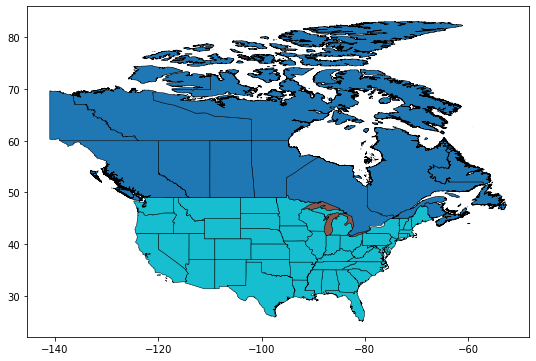

In [124]:
with_gaps.plot(column= 'COUNTRY', # Column name
             figsize=(9,9), # size of the figure
              edgecolor="black", # color of the outline
                  linewidth=0.5)

In [20]:
gaps.shape

(134, 2)

In [22]:
with_gaps.shape # 61 US and Canada Polygons and 134 gaps

(195, 22)

Once we append the gaps the observations increase from 61 to 134. Lets detect if the new data `with_gaps` has any gaps?

In [133]:
gaps_in_with_gaps=geoplanar.gaps(with_gaps) # identifying the gaps

In [134]:
gaps_in_with_gaps.shape

(3, 1)

Since we have separately stated and appended the values of gaps onto our original dataset we are left with limited gaps.

### 3. Checking the Area and Location of the Gaps

In [89]:
gaps.area

1      0.000059
2      0.012665
3      1.396759
4      0.017770
5      0.004073
         ...   
130    0.010377
131    0.000867
132    0.000158
133    0.000155
134    0.000009
Length: 134, dtype: float64

In [90]:
gaps

,geometry,COUNTRY
1,"POLYGON ((-79.05679 43.23756, -79.05059 43.204...",EMPTY
2,"POLYGON ((-79.04915 43.19638, -79.03956 43.144...",EMPTY
3,"POLYGON ((-78.90668 42.90353, -78.85944 42.792...",EMPTY
4,"POLYGON ((-77.12263 38.93206, -77.04239 38.993...",EMPTY
5,"POLYGON ((-101.38350 49.00008, -101.36248 49.0...",EMPTY
...,...,...
130,"POLYGON ((-69.27181 47.41400, -69.26809 47.418...",EMPTY
131,"POLYGON ((-69.12132 47.44270, -69.11944 47.441...",EMPTY
132,"POLYGON ((-69.05505 47.43079, -69.05452 47.430...",EMPTY
133,"POLYGON ((-69.03574 47.41010, -69.03560 47.409...",EMPTY


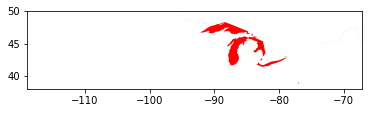

In [94]:
base = gaps.plot(color='red')
_ = base.set_xlim(-118.98705715, -67.24041383)
_ = base.set_ylim(38, 50)

In [175]:
y=gaps.buffer(1)

<AxesSubplot:>

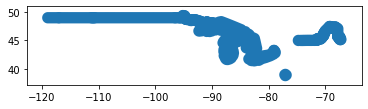

In [176]:
y.plot()

Buffer helps us identify the locations of the gaps clearly. Here we see most gaps are in the bordering areas between US/Canada (since we already fixed the problems of internal gaps in Canada's original data).

In [97]:
gaps_cen= gaps.centroid

<AxesSubplot:>

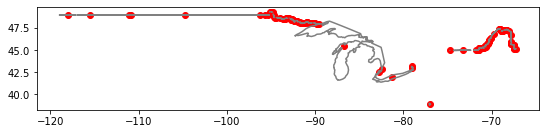

In [98]:
base = gaps.geometry.boundary.plot(edgecolor='grey', figsize=(9, 5))
gaps_cen.plot(ax=base, color='red')


<AxesSubplot:>

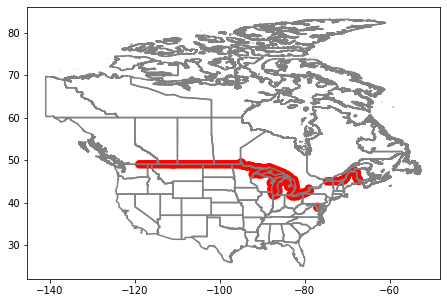

In [177]:
base = df_can_gaps_removed.geometry.boundary.plot(edgecolor='grey', figsize=(9, 5))
y.plot(ax=base, color='red')

In [178]:
gaps.total_bounds # gives the total bounds of the locations of gaps

array([-118.98705715,   38.78812027,  -67.24041383,   49.38329697])

## Geoplanar to Fill the Gaps

### 4. Filling all the Gaps in the Original Data

In [99]:
fill_gaps = geoplanar.fill_gaps(df_can_gaps_removed, largest=False) # df is the original data

In [100]:
gaps_removed = geoplanar.gaps(fill_gaps)
gaps_removed.shape

(5, 1)

<AxesSubplot:>

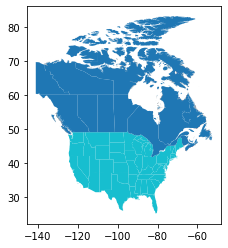

In [103]:
fill_gaps.plot(column= 'COUNTRY') # Here we filled the all the gaps

## Selective Filling of Gaps

### 5. First example: Filling only one Gap Polygon

We begin by examining the gaps and making a selection

In [130]:
selection = gaps[10:80]

<AxesSubplot:>

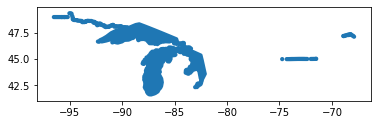

In [131]:
s=selection.buffer(0.2)
s.plot()

<AxesSubplot:>

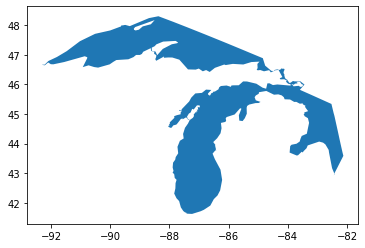

In [110]:
g = gaps.loc[[60]]
g.plot()

In [111]:
g.area

60    15.543974
dtype: float64

In [112]:
g_cen= g.centroid # centroid of g polygon

<AxesSubplot:>

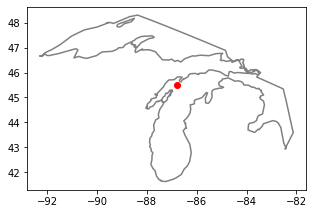

In [114]:
base = g.geometry.boundary.plot(edgecolor='grey', figsize=(5, 5)) # ploting g polygon with its centroid
g_cen.plot(ax=base, color='red')

Once we decide between gaps that should be filled and gaps that can be left out, we can apply geoplanar to fill them selectively. To test this feature we can apply it to the Great lakes between US and Canada.

In [115]:
selective_fill_gaps= geoplanar.fill_gaps(df_can_gaps_removed, g ,  largest=False)

In [117]:
selective_gaps_removed = geoplanar.gaps(selective_fill_gaps)
selective_gaps_removed.shape

(133, 1)

Here we selectively filled out only 1 gap out of the total 134 gaps. 

<AxesSubplot:>

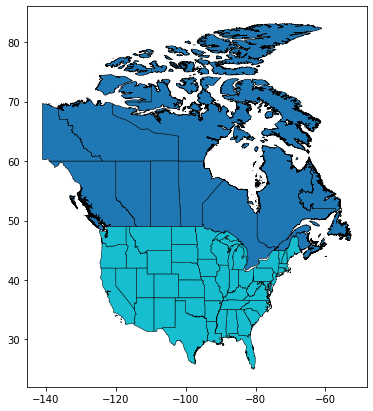

In [174]:
selective_fill_gaps.plot(column= 'COUNTRY', # Column name
             figsize=(7,7), # size of the figure
              edgecolor="black", # color of the outline
                  linewidth=0.5)

The lakes polygon shown earlier was selectively filled.

We can examine the area between original data set and the selective filled data to see if the difference exactly equals the area of the lake polygon gap filled in the example above:

In [147]:
df_can_gaps_removed.area.sum()

2510.108468329917

In [146]:
selective_fill_gaps.area.sum()

2525.652442177452

In [148]:
g.area

60    15.543974
dtype: float64

The difference of the two area sums before and after the fill equals the area of the selected polygon.

### 6. Example 2: Selective Filling Muliple Gaps

In [151]:
selection2 = gaps[10:59]

In [164]:
selection2.head()

,geometry,COUNTRY
11,"POLYGON ((-94.89134 49.33945, -94.88790 49.337...",EMPTY
12,"POLYGON ((-94.82143 49.31287, -94.82417 49.307...",EMPTY
13,"POLYGON ((-94.68633 48.83725, -94.68104 48.877...",EMPTY
14,"POLYGON ((-94.63043 48.74478, -94.69422 48.777...",EMPTY
15,"POLYGON ((-94.54871 48.71326, -94.57011 48.713...",EMPTY


<AxesSubplot:>

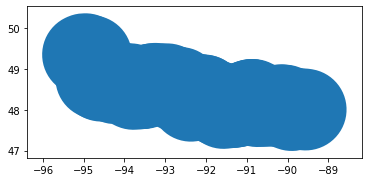

In [171]:
# visualize the polygons better with the buffer
s2=selection2.buffer(1)
s2.plot()

<AxesSubplot:>

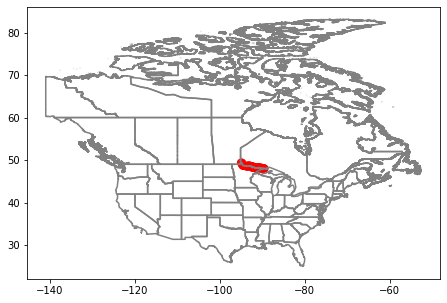

In [173]:
base = df_can_gaps_removed.geometry.boundary.plot(edgecolor='grey', figsize=(9, 5))
s2.plot(ax=base, color='red')

Here we have identified a set of polygons that we can fill instead of the single one.

In [155]:
selective_gaps_new= geoplanar.fill_gaps(df_can_gaps_removed, selection2 ,  largest=False)

In [156]:
selective_gaps_removed_new = geoplanar.gaps(selective_gaps_new)


In [158]:
selective_gaps_removed_new.shape

(85, 1)

Here we have selectively filled polygons 10 to 59 and are left with 85 gaps out of the 134 total.

In [159]:
df_can_gaps_removed.area.sum()

2510.108468329917

In [160]:
selective_gaps_new.area.sum()

2510.143839022152

In [162]:
selection2.area.sum()

0.03537069223502975

The difference in areas original and selectively filled data precisely match the area of polygons filled.